In [1]:
library(SpatEntropy)
library(ggplot2)
library(stats)
library(factoextra)
library(clusterCrit)
library(scatterplot3d)

Loading required package: spatstat
Loading required package: spatstat.data
Loading required package: nlme
Loading required package: rpart

spatstat 1.58-2       (nickname: ‘Not Even Wrong’) 
For an introduction to spatstat, type ‘beginner’ 

Welcome! Related Books: `Practical Guide To Cluster Analysis in R` at https://goo.gl/13EFCZ


In [2]:
file = '../../../../../../dataframes/enigh/HOGARES/df_09_impute.csv'

In [3]:
df <- read.csv(file = file)
data <- df
head(data)

huespedes,num_trab_d,acc_alim1,acc_alim2,acc_alim3,acc_alim4,acc_alim5,acc_alim6,alim17_1,alim17_2,⋯,regalos,remunera,transferen,parto_g,embarazo_g,negcua,est_alim,est_trans,bene_licon,diconsa
0,0,2,2,2,2,2,2,7,1,⋯,1,2,2,2,2,2,2100,700,2,1
0,0,2,2,2,2,2,2,7,3,⋯,1,2,1,2,2,2,900,20,2,1
0,0,2,2,2,2,2,2,4,2,⋯,1,2,2,2,2,2,1700,350,2,1
0,0,2,2,2,2,2,2,3,1,⋯,2,1,2,2,2,2,1200,300,2,9
0,0,2,2,2,2,2,2,7,7,⋯,1,2,1,2,2,2,3100,300,2,2
0,0,2,2,2,2,2,2,7,1,⋯,2,2,2,2,2,1,3300,2400,2,1


In [4]:
ncol(data)

[1] 78

In [5]:
data_names <- c()
data_entropy <- c()

for (column in 1:ncol(data)) {
#    print(names(data[column]))
    entropy <- SpatEntropy::shannonX(data = matrix(data[column]))
  
  data_names <- append(x = data_names, values = names(data[column]))
  data_entropy <- append(x = data_entropy, values = entropy$shannon)
}

In [6]:
df_entropy <- cbind(data.frame(data_names, data_entropy)) 
head(df_entropy)

data_names,data_entropy
huespedes,0.0000000
num_trab_d,0.0559230
acc_alim1,0.5838834
acc_alim2,0.2333031
acc_alim3,0.4507160
acc_alim4,0.4731912


In [7]:
order_df_entropy <- df_entropy[order(df_entropy$data_entropy, decreasing = T), ]
head(order_df_entropy)

,data_names,data_entropy
75,est_alim,4.319120
76,est_trans,3.310052
50,anio_estuf,3.282109
48,anio_refri,3.204282
52,anio_lavad,3.111690
44,anio_licua,3.033139


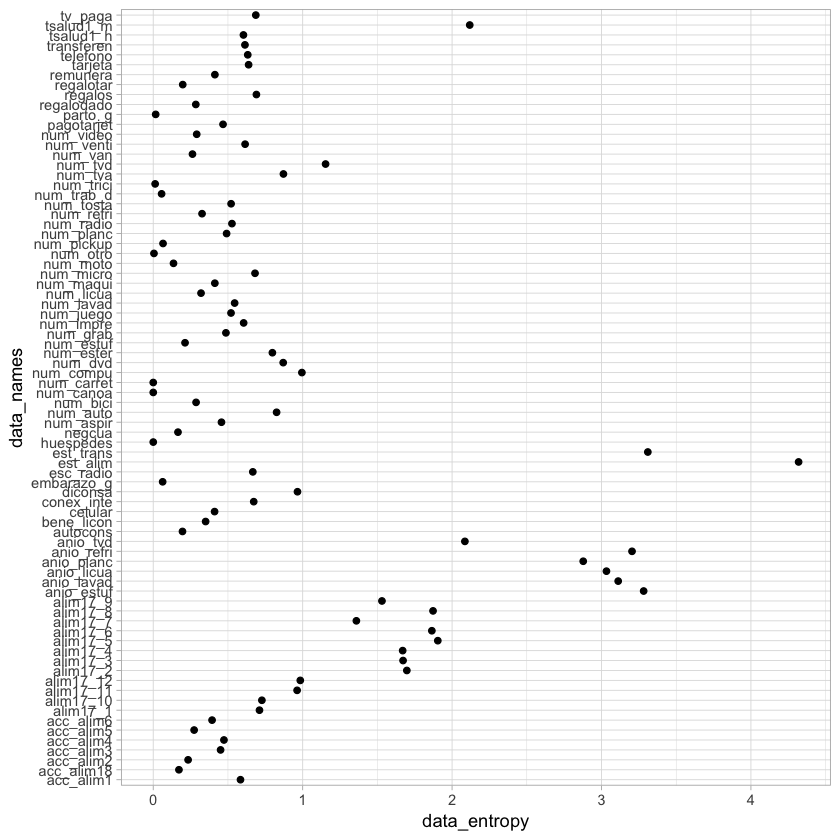

In [9]:
ggplot(df_entropy, 
       aes(y=data_names, x=data_entropy)) + geom_point() + theme_light()

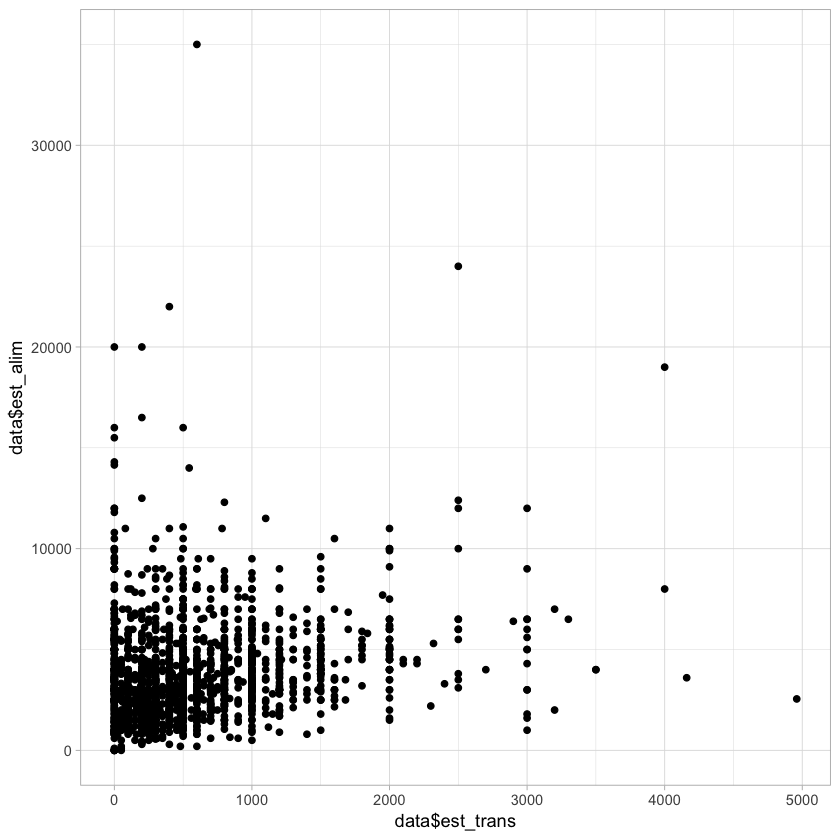

In [10]:
ggplot(data = data, 
       aes(y=data$est_alim, 
           x=data$est_trans)) + geom_point() + theme_light()

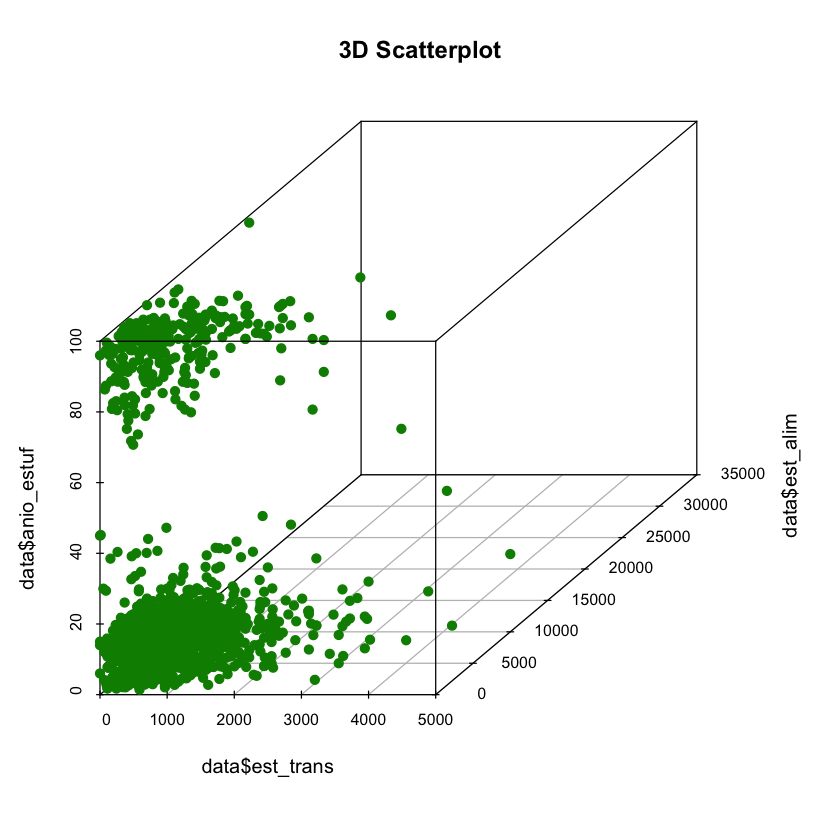

In [11]:
scatterplot3d(y=data$est_alim, 
              x=data$est_trans,
              z=data$anio_estuf, pch = 19, color = "green4", main="3D Scatterplot")

In [12]:
file = '../../../../../../dataframes/enigh/HOGARES/df_entropy_og_mixed.csv'

In [13]:
write.csv(order_df_entropy, 
          file = file,
          row.names=FALSE)
